<a href="https://colab.research.google.com/github/luca-heltai/numerical-analysis-2020-2021/blob/master/notebooks/04-interpolation-2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [3]:
def build_lagrangian_basis(q, e):
  n_q_points = q.shape[0]
  n_e_points = e.shape[0]

  # basis[i, j] is the value of l[j] on the point e[i] where
  # l[j] is the lagrange polynomial that is 1 on q[j] and 0
  # on q[k] for k != j
  basis = np.ones((n_e_points, n_q_points), dtype=np.float64)

  for i in range(n_e_points):
    for j in range(n_q_points):
      for k in range(n_q_points):
        if k == j:
          continue
        basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
  
  return basis

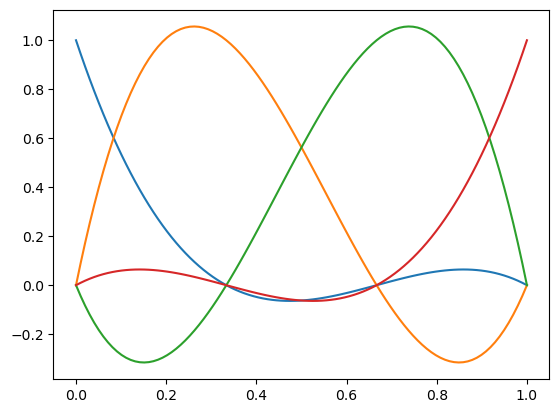

In [4]:
import matplotlib.pyplot as plt

e = np.linspace(0, 1, 100)
q = np.linspace(0, 1, 4)

basis = build_lagrangian_basis(q, e)
plt.plot(e, basis)

In [5]:
def interpolate(f, q, e):
  n_q_points = q.shape[0]
  n_e_points = e.shape[0]

  basis = build_lagrangian_basis(q, e)

  f_e = np.zeros((n_e_points,), dtype=np.float64)

  for i in range(n_e_points):
    for j in range(n_q_points):
      f_e[i] += basis[i, j] * f(q[j])
  return f_e

In [6]:
def f(x):
  return np.sin(2 * np.pi * x)

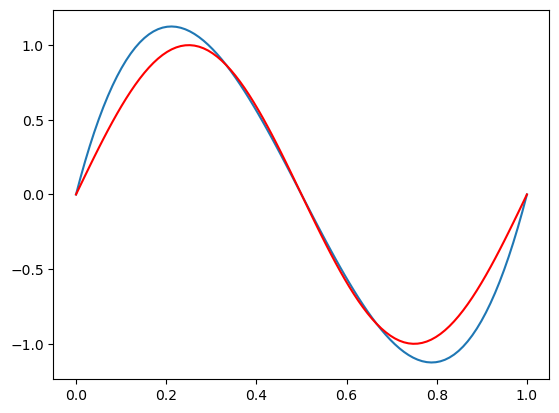

In [7]:
f_interp = interpolate(f, q, e)
plt.plot(e, f_interp)
plt.plot(e, f(e), color="red")

In [8]:
def build_lagrangian_basis_2d(q_x, q_y, e_x, e_y):
  # For a point P_{i, j} of coordinates q_x[i], q_y[j], we want to compute the
  # value of the polynomial L_{k, l} on the point P_{i, j}.
  # basis[i, j, k, l] is the value of L_{k, l} on the point (e_x[i], e_y[j])
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  basis_shape = (n_e_x_points, n_e_y_points, n_q_x_points, n_q_y_points)
  basis = np.empty(basis_shape, dtype=np.float64)

  b1 = build_lagrangian_basis(q_x, e_x)
  b2 = build_lagrangian_basis(q_y, e_y)

  for i in range(n_e_x_points):
    for j in range(n_e_y_points):
      for k in range(n_q_x_points):
        for l in range(n_q_y_points):
          basis[i, j, k , l] = b1[i, k] * b2[j, l]
  
  return basis



In [9]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 25)
e_y = np.linspace(0, 1, 27)

# build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)

In [10]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)

  basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)

  for i in range(n_e_x_points):
    for j in range(n_e_y_points):
      for k in range(n_q_x_points):
        for l in range(n_q_y_points):
          f_e[i, j] += basis[i, j, k, l] * f(q_x[k], q_y[l])
  return f_e


In [11]:
def f(x, y):
  return np.sin(2 * np.pi * x) + y * y

In [12]:
f_interpolated = interpolate_2d(f, q_x, q_y, e_x, e_y)

In [13]:
def evaluate_f(e_x, e_y):
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]
  f_e = np.empty((n_e_x_points, n_e_y_points), dtype=np.float64)

  for i in range(n_e_x_points):
    for j in range(n_e_y_points):
      f_e[i, j] = f(e_x[i], e_y[j])
  return f_e

In [14]:
f_evaluated = evaluate_f(e_x, e_y)

In [15]:
np.max(np.abs(f_interpolated - f_evaluated))

6.787240547706519e-05

In [16]:
q_x = np.linspace(0, 1, 20)
q_y = np.linspace(0, 1, 20)
e_x = np.linspace(0, 1, 1025)
e_y = np.linspace(0, 1, 1025)

interpolate_2d(f, q_x, q_y, e_x, e_y)

In [176]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 64)
e_y = np.linspace(0, 1, 64)

%timeit interpolate_2d(f, q_x, q_y, e_x, e_y)

1 loop, best of 3: 1.41 s per loop


In [177]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 64)
e_y = np.linspace(0, 1, 128)

%timeit interpolate_2d(f, q_x, q_y, e_x, e_y)

1 loop, best of 3: 2.79 s per loop


In [179]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 64)
e_y = np.linspace(0, 1, 64)

%timeit interpolate_2d(f, q_x, q_y, e_x, e_y)

1 loop, best of 3: 1.38 s per loop


In [180]:
1.5 * 2 * 2 * 64 * 64

24576.0

In [183]:
1.5 * 2 * 2 * 64 * 64 / 60 / 60

6.826666666666667

In [184]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [185]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)

  basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)

  f_q = evaluate_f(q_x, q_y)

  for i in range(n_e_x_points):
    for j in range(n_e_y_points):
      for k in range(n_q_x_points):
        for l in range(n_q_y_points):
          f_e[i, j] += basis[i, j, k, l] * f_q[k, l]
  return f_e

In [186]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [187]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)

  basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)

  f_q = evaluate_f(q_x, q_y)

  for k in range(n_q_x_points):
    for l in range(n_q_y_points):
      f_e[:, :] += basis[:, :, k, l] * f_q[k, l]
  return f_e

In [188]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [196]:
def build_lagrangian_basis_2d(q_x, q_y, e_x, e_y):
  # For a point P_{i, j} of coordinates q_x[i], q_y[j], we want to compute the
  # value of the polynomial L_{k, l} on the point P_{i, j}.
  # basis[i, j, k, l] is the value of L_{k, l} on the point (e_x[i], e_y[j])
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  b1 = build_lagrangian_basis(q_x, e_x)
  b2 = build_lagrangian_basis(q_y, e_y)

  b1 = b1.reshape((n_e_x_points, 1, n_q_x_points, 1))
  b2 = b2.reshape((1, n_e_y_points, 1, n_q_y_points))

  basis = b1 * b2
  
  return basis

In [197]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [198]:
f_interpolated = interpolate_2d(f, q_x, q_y, e_x, e_y)
f_evaluated = evaluate_f(e_x, e_y)
np.max(np.abs(f_interpolated - f_evaluated))

7.222345324953139e-05

In [201]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 1024)
e_y = np.linspace(0, 1, 1024)

%timeit interpolate_2d(f, q_x, q_y, e_x, e_y)

1 loop, best of 3: 1.69 s per loop


In [202]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [214]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
  n_q_x_points = q_x.shape[0]
  n_q_y_points = q_y.shape[0]
  n_e_x_points = e_x.shape[0]
  n_e_y_points = e_y.shape[0]

  f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)

  basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)

  f_q = evaluate_f(q_x, q_y)

  basis_reshaped = basis.reshape(
      (n_e_x_points* n_e_y_points, n_q_x_points * n_q_y_points)
      )

  f_q_reshaped = f_q.reshape((n_q_x_points * n_q_y_points,))

  f_e = basis_reshaped @ f_q_reshaped
  return f_e.reshape((n_e_x_points, n_e_y_points))

In [215]:
f_interpolated = interpolate_2d(f, q_x, q_y, e_x, e_y)
f_evaluated = evaluate_f(e_x, e_y)
np.max(np.abs(f_interpolated - f_evaluated))

7.224786566917274e-05

In [216]:
%prun interpolate_2d(f, q_x, q_y, e_x, e_y)

In [223]:
q_x = np.linspace(0, 1, 16)
q_y = np.linspace(0, 1, 16)
e_x = np.linspace(0, 1, 1025)
e_y = np.linspace(0, 1, 1025)

f_interpolated = interpolate_2d(f, q_x, q_y, e_x, e_y)
f_evaluated = evaluate_f(e_x, e_y)
np.max(np.abs(f_interpolated - f_evaluated))

9.266187817047467e-10